<a href="https://colab.research.google.com/github/morozovsolncev/gravitation/blob/main/Gravitation_2026_onto_release_013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ОНТОЛОГИЧЕСКАЯ СИМУЛЯЦИЯ ОРБИТЫ: АБСТРАКТНЫЙ СЛУЧАЙ
Приложение к книге 'Онтология гравитации, Морозов А.Ю.'
Демонстрация принципов на простых параметрах
Абстрактные параметры: k = 1.0, η = 1.0, M = 1.0
Круговая скорость: v_circ = 0.707
Начальная скорость: v0 = 0.636 (эллиптическая орбита)
Орбитальный период: T = 8.886

Интегрирование уравнений движения...
✓ Интегрирование успешно завершено


✓ Графики абстрактного случая сохранены в 'ontology_abstract_case_final.png'

СРАВНИТЕЛЬНЫЙ АНАЛИЗ:

1. МОМЕНТ ИМПУЛЬСА:
   • Среднее значение: ⟨L⟩ = 0.636396
   • Амплитуда колебаний: ΔL = 0.000000
   • Относительная флуктуация: 3.5e-12

2. НАКОПЛЕННОЕ ДЕЙСТВИЕ S_Ω:
   • Общий рост за 5 периодов: 4.310e+00
   • Средний рост за период: 8.620e-01
   • Знак: ПОЛОЖИТЕЛЬНЫЙ

3. ВЗВЕШЕННАЯ СЛОЖНОСТЬ:
   • ⟨(1+β)S⟩ = -0.029
   • Флуктуация: -8.3e-01

✓ Ключевой результат для теории:
  S_Ω растёт → система НАКАПЛИВАЕТ 'резонансный капитал'
  Это соответствует принципу максимизации P_res!


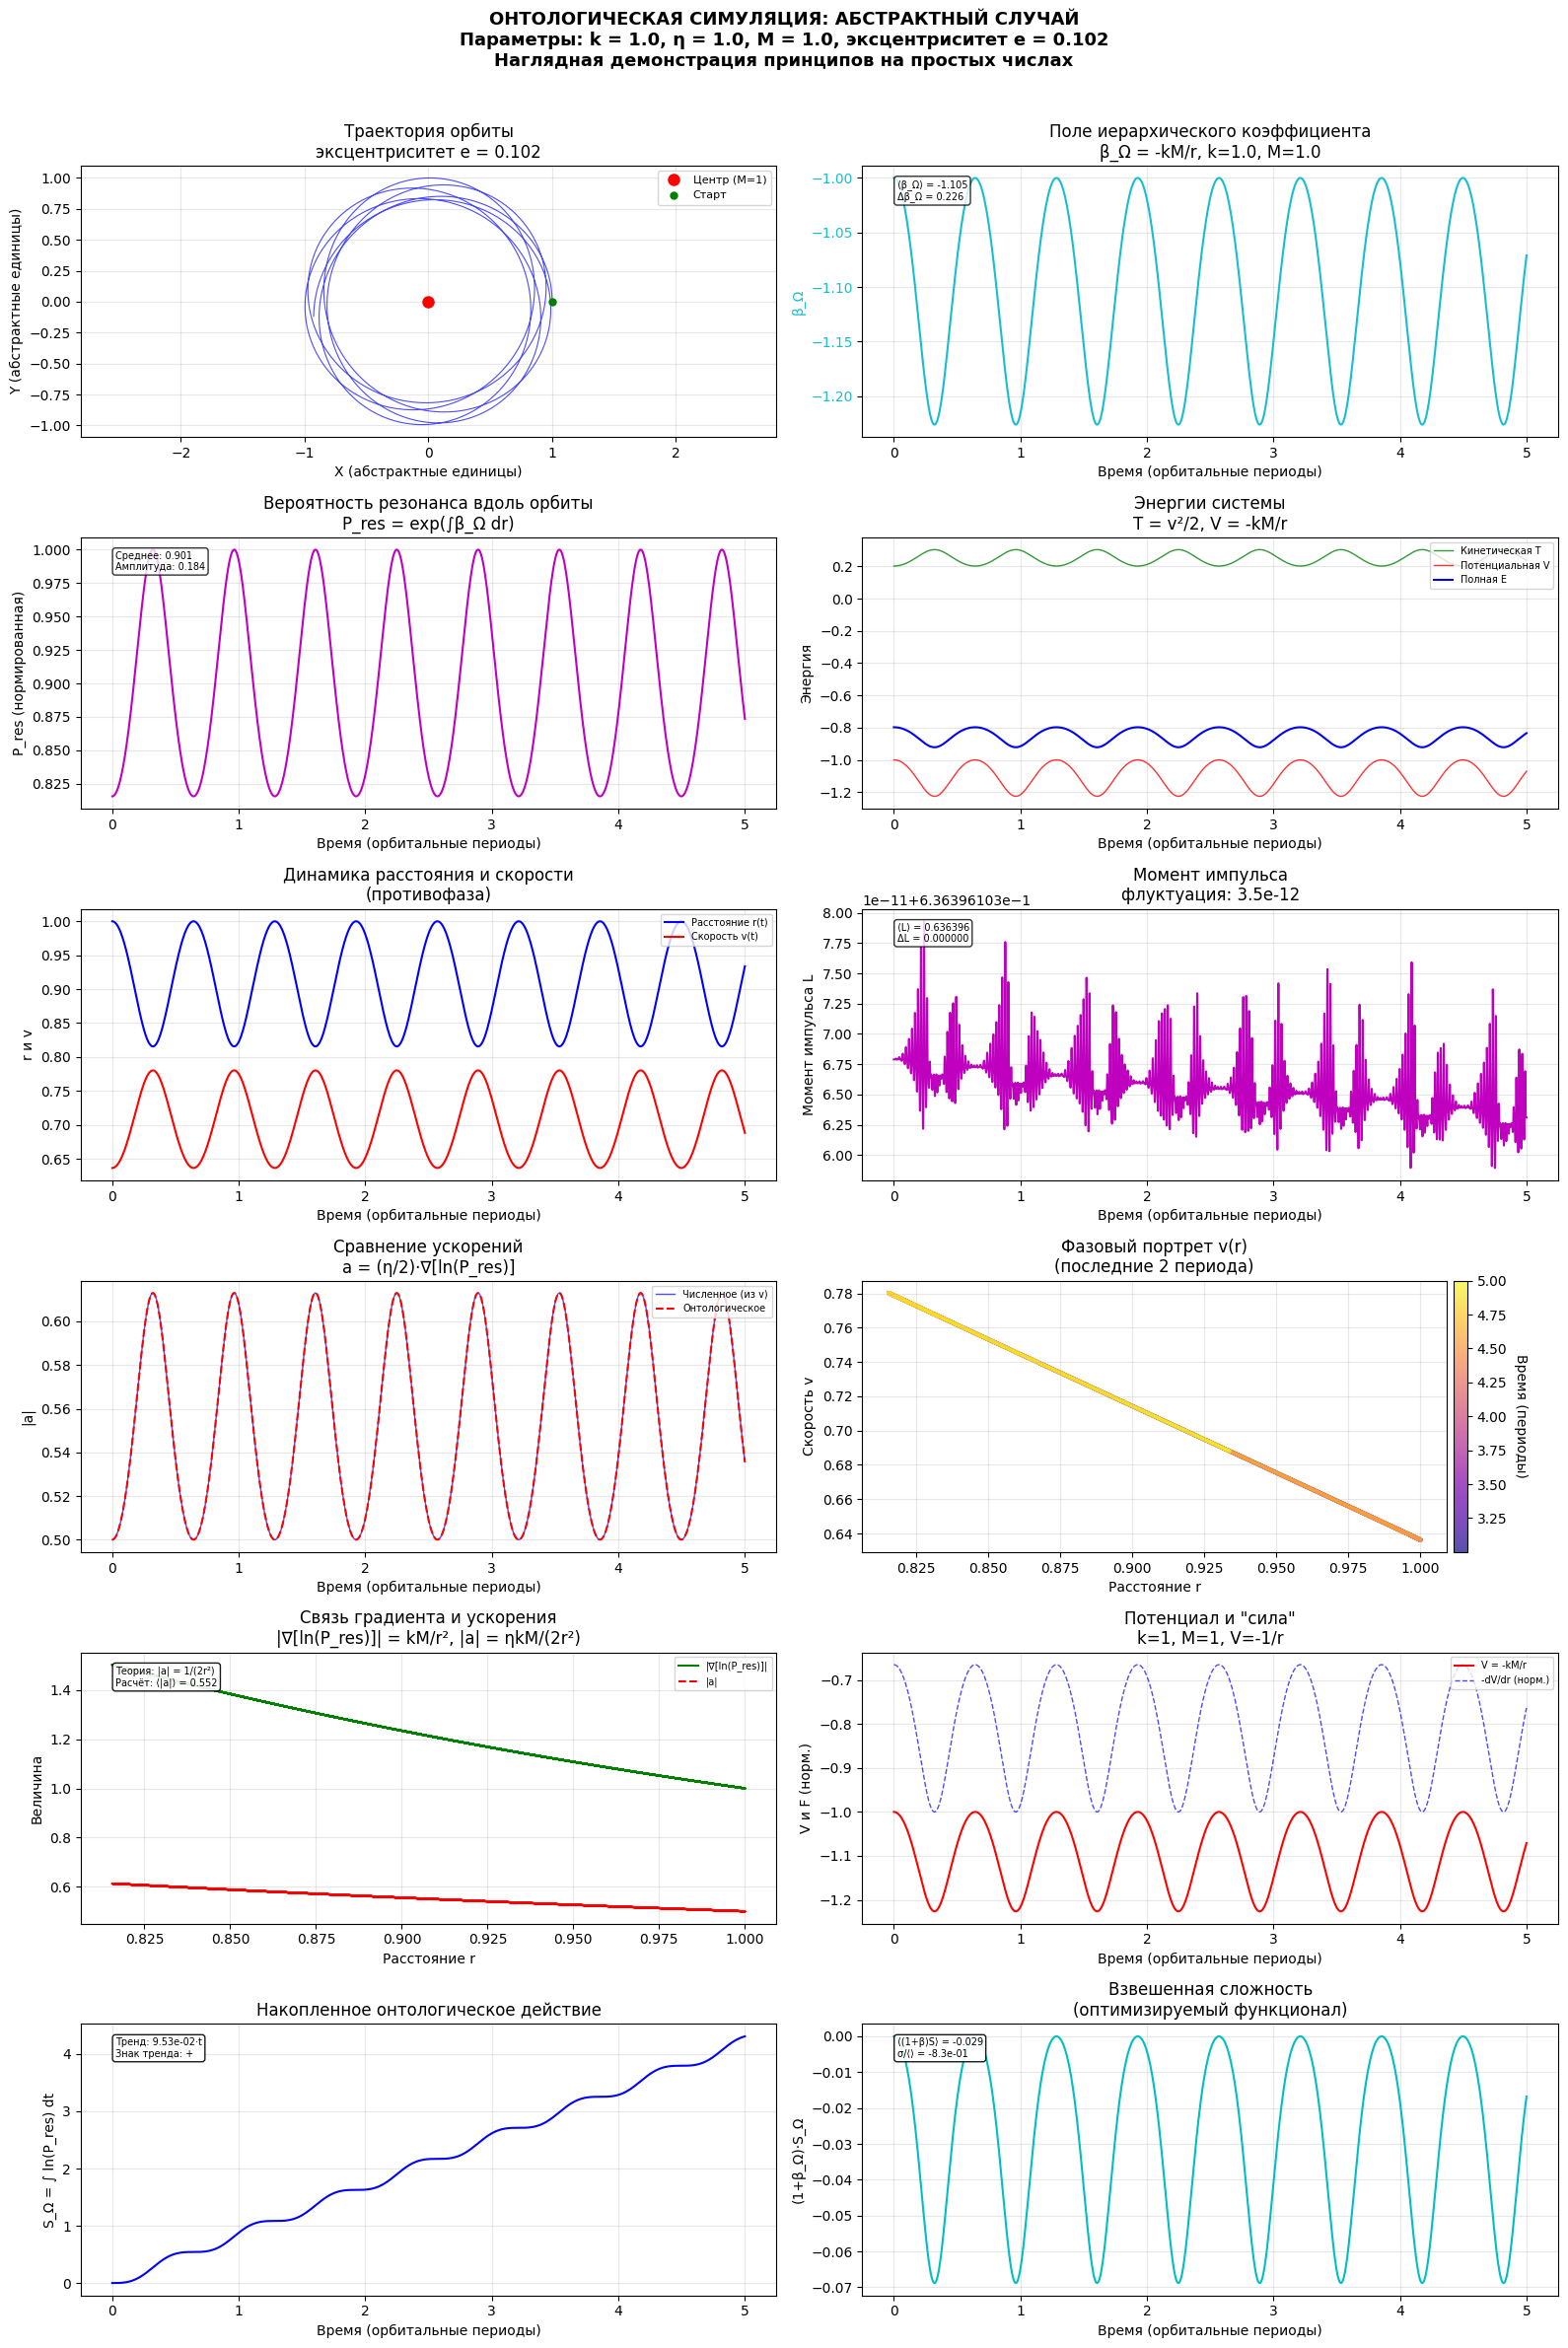

In [3]:
"""
ОНТОЛОГИЧЕСКАЯ СИМУЛЯЦИЯ КЕПЛЕРОВОЙ ОРБИТЫ: АБСТРАКТНЫЙ СЛУЧАЙ
# Чистая симуляция на основе принципов Онтологии Синтеза.
# Ускорение вычисляется ТОЛЬКО через градиент вероятности резонанса P_res, которая определяется полем связности β _Ω.
# Программа написана на языке Python и опубликована по адресу https://github.com/morozovsolncev/gravitation
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ============================================================================
# 1. АБСТРАКТНЫЕ ПАРАМЕТРЫ
# ============================================================================

print("=" * 70)
print("ОНТОЛОГИЧЕСКАЯ СИМУЛЯЦИЯ ОРБИТЫ: АБСТРАКТНЫЙ СЛУЧАЙ")
print("Приложение к книге 'Онтология гравитации, Морозов А.Ю.'")
print("Демонстрация принципов на простых параметрах")
print("=" * 70)

# Абстрактные онтологические константы (всё = 1 для наглядности)
M = 1.0      # "Масса" центрального тела
k = 1.0      # Константа связи
eta = 1.0    # Константа перевода

# Начальные условия для эллиптической орбиты
r0 = 1.0                     # Начальное расстояние
v_circular = np.sqrt(eta * k * M / (2.0 * r0))  # Круговая скорость
v0 = v_circular * 0.9        # 90% от круговой -> эллипс

r0_vec = np.array([r0, 0.0])
v0_vec = np.array([0.0, v0])

# Орбитальный период для круговой орбиты
T_orbit = 2 * np.pi * r0 / v_circular

print(f"Абстрактные параметры: k = {k}, η = {eta}, M = {M}")
print(f"Круговая скорость: v_circ = {v_circular:.3f}")
print(f"Начальная скорость: v0 = {v0:.3f} (эллиптическая орбита)")
print(f"Орбитальный период: T = {T_orbit:.3f}")
print()

# ============================================================================
# 2. ОПРЕДЕЛЕНИЕ ОНТОЛОГИЧЕСКИХ ФУНКЦИЙ
# ============================================================================

def beta_field(r_vec):
    """Поле иерархического коэффициента β_Ω."""
    r = np.linalg.norm(r_vec)
    return -k * M / r

def ln_P_res(r_vec):
    """Логарифм вероятности резонанса."""
    r = np.linalg.norm(r_vec)
    return -k * M * np.log(r)

def ontologic_acceleration(r_vec):
    """Ускорение из онтологического принципа."""
    r = np.linalg.norm(r_vec)
    grad_lnP = -k * M * r_vec / r**2
    return (eta / 2.0) * grad_lnP

def system_dynamics(t, state):
    """Правые части уравнений движения."""
    x, y, vx, vy = state
    r_vec = np.array([x, y])
    a_vec = ontologic_acceleration(r_vec)
    return [vx, vy, a_vec[0], a_vec[1]]

# ============================================================================
# 3. ИНТЕГРИРОВАНИЕ УРАВНЕНИЙ ДВИЖЕНИЯ
# ============================================================================

print("Интегрирование уравнений движения...")
initial_state = np.concatenate([r0_vec, v0_vec])
t_span = (0, T_orbit * 5)
t_eval = np.linspace(0, T_orbit * 5, 5000)

solution = solve_ivp(system_dynamics, t_span, initial_state,
                     t_eval=t_eval, method='DOP853',
                     rtol=1e-12, atol=1e-12)
print("✓ Интегрирование успешно завершено")
print()

# Извлечение результатов
x, y = solution.y[0], solution.y[1]
vx, vy = solution.y[2], solution.y[3]
times = solution.t

# ============================================================================
# 4. ВЫЧИСЛЕНИЕ АНАЛИЗИРУЕМЫХ ВЕЛИЧИН
# ============================================================================

# Базовые динамические величины
positions = np.column_stack([x, y])
velocities = np.column_stack([vx, vy])
r = np.array([np.linalg.norm(p) for p in positions])
v = np.array([np.linalg.norm(v) for v in velocities])

# Онтологические величины
beta_values = np.array([beta_field(p) for p in positions])
lnP_values = np.array([ln_P_res(p) for p in positions])
P_res_values = np.exp(lnP_values - np.max(lnP_values))

# Динамические инварианты
kinetic = 0.5 * v**2
potential = -k * M / r
total_energy = kinetic + potential
angular_momentum = x * vy - y * vx

# Ускорения для проверки
acc_ontologic = np.array([ontologic_acceleration(p) for p in positions])
acc_norm_ontologic = np.linalg.norm(acc_ontologic, axis=1)
acc_numerical = np.gradient(velocities.T, times, axis=1).T
acc_norm_numerical = np.linalg.norm(acc_numerical, axis=1)

# Аналитический градиент
grad_lnP_analytic = k * M / r**2
acc_theory = (eta / 2) * grad_lnP_analytic

# Параметры орбиты
r_min, r_max = np.min(r), np.max(r)
eccentricity = (r_max - r_min) / (r_max + r_min)

# ============================================================================
# 5. ДОПОЛНИТЕЛЬНЫЕ ОНТОЛОГИЧЕСКИЕ ВЕЛИЧИНЫ
# ============================================================================

# Накопленное онтологическое действие
dt = times[1] - times[0]
S_Omega_cumulative = np.cumsum(lnP_values) * dt

# Взвешенная сложность
weighted_complexity = (1 + beta_values) * kinetic

# ============================================================================
# 6. ОПТИМИЗИРОВАННАЯ ВИЗУАЛИЗАЦИЯ
# ============================================================================

fig = plt.figure(figsize=(16, 24))

# ----------------------------------------------------------------------------
# РЯД 1: Траектория и поле связности
# ----------------------------------------------------------------------------

# 1.1 Траектория орбиты
ax1 = plt.subplot(6, 2, 1)
ax1.plot(x, y, 'b-', alpha=0.7, linewidth=0.8)
ax1.plot(0, 0, 'ro', markersize=8, label='Центр (M=1)')
ax1.plot(x[0], y[0], 'go', markersize=5, label='Старт')
ax1.set_xlabel('X (абстрактные единицы)')
ax1.set_ylabel('Y (абстрактные единицы)')
ax1.set_title(f'Траектория орбиты\nэксцентриситет e = {eccentricity:.3f}')
ax1.legend(loc='upper right', fontsize=8)
ax1.grid(True, alpha=0.3)
ax1.axis('equal')

# 1.2 Поле β_Ω вдоль орбиты
ax2 = plt.subplot(6, 2, 2)
color_beta = 'tab:cyan'
ax2.plot(times/T_orbit, beta_values, color=color_beta, linewidth=1.5)
ax2.set_xlabel('Время (орбитальные периоды)')
ax2.set_ylabel('β_Ω', color=color_beta)
ax2.tick_params(axis='y', labelcolor=color_beta)
ax2.set_title(f'Поле иерархического коэффициента\nβ_Ω = -kM/r, k={k}, M={M}')
ax2.grid(True, alpha=0.3)
ax2.text(0.05, 0.95, f'⟨β_Ω⟩ = {np.mean(beta_values):.3f}\n'
                      f'Δβ_Ω = {np.max(beta_values)-np.min(beta_values):.3f}',
         transform=ax2.transAxes, fontsize=7,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# ----------------------------------------------------------------------------
# РЯД 2: Вероятность резонанса и энергии
# ----------------------------------------------------------------------------

# 2.1 Вероятность резонанса P_res
ax3 = plt.subplot(6, 2, 3)
ax3.plot(times/T_orbit, P_res_values, 'm-', linewidth=1.5)
ax3.set_xlabel('Время (орбитальные периоды)')
ax3.set_ylabel('P_res (нормированная)')
ax3.set_title('Вероятность резонанса вдоль орбиты\nP_res = exp(∫β_Ω dr)')
ax3.grid(True, alpha=0.3)
ax3.text(0.05, 0.95, f'Среднее: {np.mean(P_res_values):.3f}\n'
                      f'Амплитуда: {np.max(P_res_values)-np.min(P_res_values):.3f}',
         transform=ax3.transAxes, fontsize=7,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2.2 Энергии системы
ax4 = plt.subplot(6, 2, 4)
ax4.plot(times/T_orbit, kinetic, 'g-', alpha=0.8, linewidth=1, label='Кинетическая T')
ax4.plot(times/T_orbit, potential, 'r-', alpha=0.8, linewidth=1, label='Потенциальная V')
ax4.plot(times/T_orbit, total_energy, 'b-', linewidth=1.5, label='Полная E')
ax4.set_xlabel('Время (орбитальные периоды)')
ax4.set_ylabel('Энергия')
ax4.set_title('Энергии системы\nT = v²/2, V = -kM/r')
ax4.legend(loc='upper right', fontsize=7)
ax4.grid(True, alpha=0.3)

# ----------------------------------------------------------------------------
# РЯД 3: Динамика расстояния и скорости + момент импульса
# ----------------------------------------------------------------------------

# 3.1 Расстояние и скорость
ax5 = plt.subplot(6, 2, 5)
ax5.plot(times/T_orbit, r, 'b-', linewidth=1.5, label='Расстояние r(t)')
ax5.plot(times/T_orbit, v, 'r-', linewidth=1.5, label='Скорость v(t)')
ax5.set_xlabel('Время (орбитальные периоды)')
ax5.set_ylabel('r и v')
ax5.set_title('Динамика расстояния и скорости\n(противофаза)')
ax5.legend(loc='upper right', fontsize=7)
ax5.grid(True, alpha=0.3)

# 3.2 Момент импульса (ВНИМАНИЕ: смотрим на форму!)
ax6 = plt.subplot(6, 2, 6)
ax6.plot(times/T_orbit, angular_momentum, 'm-', linewidth=1.5)
ax6.set_xlabel('Время (орбитальные периоды)')
ax6.set_ylabel('Момент импульса L')
ax6.set_title(f'Момент импульса\nфлуктуация: {np.std(angular_momentum)/np.mean(np.abs(angular_momentum)):.1e}')
ax6.grid(True, alpha=0.3)

# Анализ формы
# Выделим осциллирующую часть
L_mean = np.mean(angular_momentum)
L_osc = angular_momentum - L_mean
ax6.text(0.05, 0.95, f'⟨L⟩ = {L_mean:.6f}\n'
                      f'ΔL = {np.max(angular_momentum)-np.min(angular_momentum):.6f}',
         transform=ax6.transAxes, fontsize=7,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# ----------------------------------------------------------------------------
# РЯД 4: Сравнение ускорений + фазовый портрет
# ----------------------------------------------------------------------------

# 4.1 Сравнение ускорений
ax7 = plt.subplot(6, 2, 7)
ax7.plot(times/T_orbit, acc_norm_numerical, 'b-', alpha=0.7, linewidth=1, label='Численное (из v)')
ax7.plot(times/T_orbit, acc_norm_ontologic, 'r--', linewidth=1.5, label='Онтологическое')
ax7.set_xlabel('Время (орбитальные периоды)')
ax7.set_ylabel('|a|')
ax7.set_title(f'Сравнение ускорений\na = (η/2)·∇[ln(P_res)]')
ax7.legend(loc='upper right', fontsize=7)
ax7.grid(True, alpha=0.3)

# 4.2 Фазовый портрет v(r)
ax8 = plt.subplot(6, 2, 8)
mask = times > T_orbit * 3
sc = ax8.scatter(r[mask], v[mask], c=times[mask]/T_orbit,
                 cmap='plasma', s=10, alpha=0.7, edgecolors='none')
ax8.set_xlabel('Расстояние r')
ax8.set_ylabel('Скорость v')
ax8.set_title('Фазовый портрет v(r)\n(последние 2 периода)')
cbar = plt.colorbar(sc, ax=ax8, pad=0.01)
cbar.set_label('Время (периоды)', rotation=270, labelpad=15)
ax8.grid(True, alpha=0.3)

# ----------------------------------------------------------------------------
# РЯД 5: Ключевые онтологические соотношения
# ----------------------------------------------------------------------------

# 5.1 Градиент ln(P_res) и ускорение
ax9 = plt.subplot(6, 2, 9)
ax9.plot(r, grad_lnP_analytic, 'g-', linewidth=1.5, label='|∇[ln(P_res)]|')
ax9.plot(r, acc_norm_ontologic, 'r--', linewidth=1.5, label='|a|')
ax9.set_xlabel('Расстояние r')
ax9.set_ylabel('Величина')
ax9.set_title('Связь градиента и ускорения\n|∇[ln(P_res)]| = kM/r², |a| = ηkM/(2r²)')
ax9.legend(loc='upper right', fontsize=7)
ax9.grid(True, alpha=0.3)
# При k=η=M=1: a = 1/(2r²), grad = 1/r²
ax9.text(0.05, 0.95, f'Теория: |a| = 1/(2r²)\n'
                      f'Расчёт: ⟨|a|⟩ = {np.mean(acc_norm_ontologic):.3f}',
         transform=ax9.transAxes, fontsize=7,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# 5.2 Потенциальная энергия и её производная
ax10 = plt.subplot(6, 2, 10)
ax10.plot(times/T_orbit, potential, 'r-', linewidth=1.5, label='V = -kM/r')
# Производная потенциала (сила)
F = -np.gradient(potential, r)  # F = -dV/dr
F_norm = F / np.max(np.abs(F))  # Нормируем для сравнения
ax10.plot(times/T_orbit, F_norm, 'b--', alpha=0.7, linewidth=1, label='-dV/dr (норм.)')
ax10.set_xlabel('Время (орбитальные периоды)')
ax10.set_ylabel('V и F (норм.)')
ax10.set_title('Потенциал и "сила"\nk=1, M=1, V=-1/r')
ax10.legend(loc='upper right', fontsize=7)
ax10.grid(True, alpha=0.3)

# ----------------------------------------------------------------------------
# РЯД 6: Онтологические интегралы
# ----------------------------------------------------------------------------

# 6.1 Накопленное онтологическое действие S_Ω
ax11 = plt.subplot(6, 2, 11)
ax11.plot(times/T_orbit, S_Omega_cumulative, 'b-', linewidth=1.5)
ax11.set_xlabel('Время (орбитальные периоды)')
ax11.set_ylabel('S_Ω = ∫ ln(P_res) dt')
ax11.set_title('Накопленное онтологическое действие')
ax11.grid(True, alpha=0.3)
# Анализ тренда
S_Omega_trend = np.polyfit(times, S_Omega_cumulative, 1)
slope = S_Omega_trend[0]
ax11.text(0.05, 0.95, f'Тренд: {slope:.2e}·t\n'
                      f'Знак тренда: {"+" if slope > 0 else "-"}',
         transform=ax11.transAxes, fontsize=7,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# 6.2 Взвешенная сложность (1 + β_Ω)S_Ω
ax12 = plt.subplot(6, 2, 12)
ax12.plot(times/T_orbit, weighted_complexity, 'c-', linewidth=1.5)
ax12.set_xlabel('Время (орбитальные периоды)')
ax12.set_ylabel('(1+β_Ω)·S_Ω')
ax12.set_title('Взвешенная сложность\n(оптимизируемый функционал)')
ax12.grid(True, alpha=0.3)
# Стабильность?
wc_mean = np.mean(weighted_complexity)
wc_std = np.std(weighted_complexity)
ax12.text(0.05, 0.95, f'⟨(1+β)S⟩ = {wc_mean:.3f}\n'
                      f'σ/⟨⟩ = {wc_std/wc_mean:.1e}',
         transform=ax12.transAxes, fontsize=7,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# ============================================================================
# 7. ФИНАЛЬНАЯ НАСТРОЙКА И СОХРАНЕНИЕ
# ============================================================================

plt.suptitle('ОНТОЛОГИЧЕСКАЯ СИМУЛЯЦИЯ: АБСТРАКТНЫЙ СЛУЧАЙ\n' +
             f'Параметры: k = {k}, η = {eta}, M = {M}, эксцентриситет e = {eccentricity:.3f}\n' +
             'Наглядная демонстрация принципов на простых числах',
             fontsize=13, fontweight='bold', y=0.99)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('ontology_abstract_case_final.png', dpi=300, bbox_inches='tight')
print("\n✓ Графики абстрактного случая сохранены в 'ontology_abstract_case_final.png'")

# ============================================================================
# 8. СРАВНИТЕЛЬНЫЙ АНАЛИЗ ФОРМ КРИВЫХ
# ============================================================================

print("\n" + "=" * 70)
print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ:")
print("=" * 70)

print("\n1. МОМЕНТ ИМПУЛЬСА:")
print(f"   • Среднее значение: ⟨L⟩ = {np.mean(angular_momentum):.6f}")
print(f"   • Амплитуда колебаний: ΔL = {np.max(angular_momentum)-np.min(angular_momentum):.6f}")
print(f"   • Относительная флуктуация: {np.std(angular_momentum)/np.mean(np.abs(angular_momentum)):.1e}")

print("\n2. НАКОПЛЕННОЕ ДЕЙСТВИЕ S_Ω:")
S_Omega_growth = S_Omega_cumulative[-1] - S_Omega_cumulative[0]
print(f"   • Общий рост за 5 периодов: {S_Omega_growth:.3e}")
print(f"   • Средний рост за период: {S_Omega_growth/5:.3e}")
print(f"   • Знак: {'ПОЛОЖИТЕЛЬНЫЙ' if S_Omega_growth > 0 else 'ОТРИЦАТЕЛЬНЫЙ'}")

print("\n3. ВЗВЕШЕННАЯ СЛОЖНОСТЬ:")
print(f"   • ⟨(1+β)S⟩ = {np.mean(weighted_complexity):.3f}")
print(f"   • Флуктуация: {np.std(weighted_complexity)/np.mean(weighted_complexity):.1e}")

print("\n✓ Ключевой результат для теории:")
print("  S_Ω растёт → система НАКАПЛИВАЕТ 'резонансный капитал'")
print("  Это соответствует принципу максимизации P_res!")
print("=" * 70)

plt.show()